# Daub 5/3 integer-to-integer system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Импорт пользовательских функций.

In [2]:
from Functions.user_functions import indx_even
from Functions.daub_5_3 import daub_5_3
from Functions.daub_5_3_lift import daub_5_3_lift
from Functions.idaub_5_3_lift import idaub_5_3_lift
from Functions.daub_5_3_lift_2D import daub_5_3_lift_2D
from Functions.idaub_5_3_lift_2D import idaub_5_3_lift_2D

In [3]:
f = np.random.randint(low=-10, high=11, size=8)
N = len(f)
d = [0] * (N//2)
a = [0] * (N//2)

### Исследование коэффициентов ${d}$

In [4]:
# Функция вычисления коэффициентов флуктуации.
def d_func(k, f, N, int_flag):
    if int_flag:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) //2
    else:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) /2

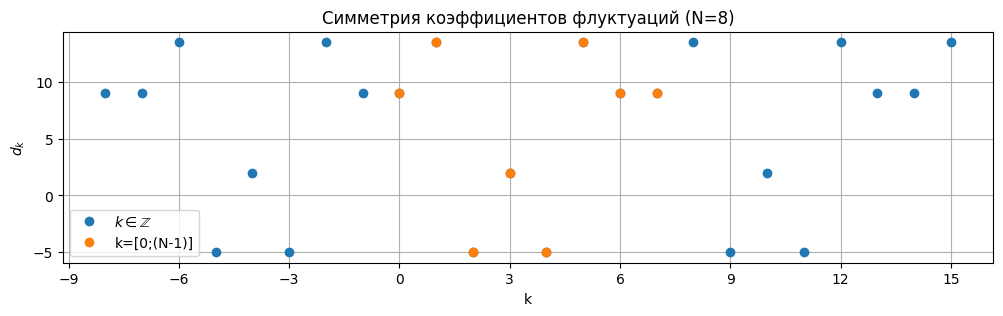

In [5]:
n_gr = []
d_gr = []
for k in range(-N,2*N):
    n_gr.append(k)
    d_gr.append(d_func(k, f, N, int_flag=False))
n_gr_N = []
d_gr_N = []

for k in range(N):
    n_gr_N.append(k)
    d_gr_N.append(d_func(k, f, N, int_flag=False))
    
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(12)
ax.plot(n_gr, d_gr, 'o')
ax.plot(n_gr_N, d_gr_N, 'o')

# Force integer ticks on x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(['$k \in \mathbb{Z}$','k=[0;(N-1)]'])
plt.title('Симметрия коэффициентов флуктуаций' + ' (N=' + str(N) + ')')
plt.xlabel('k')
plt.ylabel('$d_k$')
plt.grid(True)
plt.savefig('readme_img/d_symmetry.png', bbox_inches='tight')
plt.show()

Отсюда вывод: ${d_{-1} = d_0}$.

## Прямое преобразование

In [6]:
for k in range(N//2):
    d[k] = f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)])/2
    if k == 0:
        a[k] = f[indx_even(2*k,N)] + d[k] /2
    else:
        a[k] = f[indx_even(2*k,N)] + (d[k-1] + d[k]) /4
    #a[k] = -1/8*(f[indx_even(2*k-2,N)] + f[indx_even(2*k+2,N)]) + 1/4*(f[indx_even(2*k-1,N)] + f[indx_even(2*k+1,N)]) + 3/4*f[indx_even(2*k,N)]
print('a', a)
print('d', d)

a [12.5, -0.375, -6.875, 0.25]
d [9.0, 13.5, -5.0, 2.0]


## Обратное преобразование

In [7]:
f_rec = [0] * N
# Odd values.
for k in range(N//2):
    if k == 0:
        f_rec[2*k] = a[k] - d[k] /2
    else:
        f_rec[2*k] = a[k] - (d[k-1] + d[k]) /4

# Even values.
for k in range(N//2):
    f_rec[2*k+1] = d[k] + (f[2*k] + f[indx_even(2*k+2,N)])/2
print('Reconstruction:', f_rec)
print('Original:', f)
print('Difference:', f-f_rec)

Reconstruction: [8.0, 10.0, -6.0, 6.0, -9.0, -9.0, 1.0, 3.0]
Original: [ 8 10 -6  6 -9 -9  1  3]
Difference: [0. 0. 0. 0. 0. 0. 0. 0.]


## Прямое и обратное преобразование при помощи матричных операций

In [8]:
Mdir = np.matrix(np.concatenate(daub_5_3(N), axis = 0))
tr = np.matrix(f)*(Mdir.T)
Mrev = np.linalg.inv(Mdir).T
print('Wavelet coefficients:', tr.tolist()[0])
print('Reconstruction:', (tr * Mrev).tolist()[0])
print('Original:', f)
print('Difference:', f-(tr * Mrev).tolist()[0])

Wavelet coefficients: [12.5, -0.375, -6.875, 0.25, 9.0, 13.5, -5.0, 2.0]
Reconstruction: [8.0, 10.0, -6.0, 6.0, -9.0, -9.0, 1.0, 3.0]
Original: [ 8 10 -6  6 -9 -9  1  3]
Difference: [0. 0. 0. 0. 0. 0. 0. 0.]


## Целочисленные преобразования

Созданы функции lifting-преобразования.

In [9]:
# float-преобразование.
coeff_float = daub_5_3_lift(f, int_flag=False)
print(coeff_float)

# int-преобразование.
coeff_int = daub_5_3_lift(f, int_flag=True)
print(coeff_int)

[12.5   -0.375 -6.875  0.25   9.    13.5   -5.     2.   ]
[13  0 -7  0  9 13 -5  2]


Обратное преобразование, также по lifting-схеме.

In [10]:
# float-преобразование.
f_float = idaub_5_3_lift(coeff_float, int_flag=False)
print(np.array(f_float).dtype)
print(f_float)

# int-преобразование.
f_int = idaub_5_3_lift(coeff_int, int_flag=True)
print(np.array(f_int).dtype)
print(f_int)

print('Difference:', [a - b for a, b in zip(f_float, f_int)])

float64
[8.0, 10.0, -6.0, 6.0, -9.0, -9.0, 1.0, 3.0]
int32
[8, 10, -6, 6, -9, -9, 1, 3]
Difference: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## 2D-преобразование

Формируем двумерный массив.

In [11]:
g = np.random.randint(low=-10, high=11, size=10*8).reshape(10,8)
print(g)

[[ -3   0   1  -5   0  -5  -4  -3]
 [ -8  -6  -9   4   4   6   0  10]
 [  7  -8   6  10  -2   9   5  10]
 [  5  -9   7   6  -2   2   3  -8]
 [ -3  -2 -10  10   7  -2  -5   9]
 [  2  -6   8   5   5 -10  -5   1]
 [  0  -7   7   1   4   0   5   8]
 [  3  -1  -7  -7   0   9   8   9]
 [ -4  -9   7   6   7   3  -9  -1]
 [ -2   6   6  -8  -9   2  -1  -2]]


### Прямое преобразование

In [12]:
# float-преобразование.
coeff_2D_float = daub_5_3_lift_2D(g, int_flag=False)
print(coeff_2D_float.dtype)
print(coeff_2D_float)

float64
[[  4.25       6.625     -8.75      -8.        -1.5      -12.
   -7.        -9.      ]
 [  4.375      5.6875    -1.0625     6.0625    -8.25       3.
    4.75       5.5     ]
 [  2.25     -10.5        8.4375     0.4375    17.5       10.5
    1.25      16.5     ]
 [ -5.25       4.625      0.5        2.875     -5.5       -2.
   -2.        -0.5     ]
 [-11.         5.25      12.       -11.       -13.         4.
   -2.         8.      ]
 [ -4.59375   -3.671875   4.171875   3.015625   0.0625     4.25
    3.4375     9.125   ]
 [ -0.84375    2.921875   1.09375    2.25     -12.6875     6.875
    3.        -5.5     ]
 [ -4.25       3.40625    4.359375  -5.171875  -8.         0.625
  -10.1875    10.      ]
 [ -0.5625    -5.15625    3.5        7.46875   -3.625     -3.
    4.         2.875   ]
 [ -5.5        8.        -2.875     -5.        -2.5       -4.5
    6.         3.      ]]


In [13]:
# int-преобразование.
coeff_2D_int = daub_5_3_lift_2D(g, int_flag=True)
print(coeff_2D_int.dtype)
print(coeff_2D_int)

int32
[[  5   7  -9  -8  -1 -12  -7  -9]
 [  4   5  -1   5  -9   3   4   5]
 [  1 -11   8   0  17  10   1  16]
 [ -6   4   1   3  -6  -2  -3  -1]
 [-11   5  12 -12 -14   4  -2   8]
 [ -5  -4   5   3   0   4   3   9]
 [ -1   3   1   2 -13   6   2  -6]
 [ -4   3   4  -5  -8   0 -10  10]
 [  0  -6   3   8  -4  -3   4   3]
 [ -5   8  -3  -5  -3  -5   6   3]]


In [14]:
print(np.sum(g.astype(float)**2))
print(np.sum(coeff_2D_int.astype(float)**2))

2907.0
3482.0


### Обратное преобразование

In [15]:
g_float = idaub_5_3_lift_2D(coeff_2D_float, int_flag=False)
print(g_float)
print('Difference (sum):', np.sum((g-g_float)**2))

[[ -3.   0.   1.  -5.   0.  -5.  -4.  -3.]
 [ -8.  -6.  -9.   4.   4.   6.   0.  10.]
 [  7.  -8.   6.  10.  -2.   9.   5.  10.]
 [  5.  -9.   7.   6.  -2.   2.   3.  -8.]
 [ -3.  -2. -10.  10.   7.  -2.  -5.   9.]
 [  2.  -6.   8.   5.   5. -10.  -5.   1.]
 [  0.  -7.   7.   1.   4.   0.   5.   8.]
 [  3.  -1.  -7.  -7.   0.   9.   8.   9.]
 [ -4.  -9.   7.   6.   7.   3.  -9.  -1.]
 [ -2.   6.   6.  -8.  -9.   2.  -1.  -2.]]
Difference (sum): 0.0


In [16]:
g_int = idaub_5_3_lift_2D(coeff_2D_int, int_flag=True)
print(g_int)
print('Difference (sum):', np.sum((g-g_int).astype(float)**2))

[[ -3   0   1  -5   0  -5  -4  -3]
 [ -8  -6  -9   4   4   6   0  10]
 [  7  -8   6  10  -2   9   5  10]
 [  5  -9   7   6  -2   2   3  -8]
 [ -3  -2 -10  10   7  -2  -5   9]
 [  2  -6   8   5   5 -10  -5   1]
 [  0  -7   7   1   4   0   5   8]
 [  3  -1  -7  -7   0   9   8   9]
 [ -4  -9   7   6   7   3  -9  -1]
 [ -2   6   6  -8  -9   2  -1  -2]]
Difference (sum): 0.0
